# Check First and Last Frames of any step in given video

In [1]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
import json
import os
from ipywidgets import Video, Image
from IPython.display import display
import cv2
import numpy as np
import matplotlib.pyplot as plt

class Narration:
    def __init__(self, text, begin_timestamp, end_timestamp=None):
        self.text = text
        self.begin = begin_timestamp
        self.end = end_timestamp

In [2]:
def get_narrations(video_key, narrations_path):
    narration_objs = []
    
    with open(narrations_path) as f:
        data = json.load(f)
        narrations = data[video_key]["narration_pass_1"]["narrations"]
        for narration in narrations:
            if narration_objs:
                narration_objs[-1].end = narration["timestamp_sec"]
            narration_objs.append(Narration(narration["narration_text"],narration["timestamp_sec"]))

    # print narrations (for debugging and choosing steps)
    for i in range(len(narration_objs)):
        print("Annotations for step {}:".format(i), narration_objs[i].text)
        print("Begin-time for step {}: ".format(i),narration_objs[i].begin)
        print("Finish-time for step {}:".format(i),narration_objs[i].end)
        print("------------")
        
    return narration_objs

In [3]:
def get_frames_for_step(video_key, step, narration_objs, video_path, clip_save_path):
    
    print("Annotation for step {}:".format(step), narration_objs[step].text)
    print("Begin-time for step {}: ".format(step),narration_objs[step].begin)
    print("Ended-time for step {}:".format(step),narration_objs[step].end)
    print("------------")
    
    
    # extract and save the subclip to "clip_save_path"
    clip_file_path = clip_save_path + video_key + "_" + str(step) + ".mp4"
    
    ffmpeg_extract_subclip(video_path, narration_objs[step].begin, 
                           narration_objs[step].end, 
                           targetname = clip_file_path)
    
    
    # capture the video
    cap = cv2.VideoCapture(clip_file_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv2.CAP_PROP_FPS)
    
    # for debugging
#     print('Total frames: ' + str(total_frames))
#     print('width: ' + str(width))
#     print('height: ' + str(height))
#     print('fps: ' + str(fps))
    
    
    success_1, success_2 = False, False
    first_frame_num, last_frame_num = 0, total_frames

    
    while not success_1:
        cap.set(cv2.CAP_PROP_POS_FRAMES, first_frame_num)
        success_1, image_1 = cap.read()
        first_frame_num += 1
    while not success_2:
        cap.set(cv2.CAP_PROP_POS_FRAMES, last_frame_num)
        success_2, image_2 = cap.read()
        last_frame_num -= 1


    plt.figure()
    f, ax = plt.subplots(1,2) 
    ax[0].set_title('First Frame')
    ax[1].set_title('Last Frame')
    ax[0].imshow(image_1)
    ax[1].imshow(image_2)
    
    [axi.set_axis_off() for axi in ax.ravel()]
    
    return(clip_file_path)

# Video 1

In [4]:
# Hyperparameters

narrations_path = "/local1/hu528/ego4d_data/v1/annotations/narration.json"
video_path = "/local1/hu528/ego4d_data/v1/full_scale/a67789f8-3788-4a8d-aba8-9b2c2945d457.mp4"
clip_save_path = "/local1/bryanzhou008/ego4d/v1/clips/"
video_key = "a67789f8-3788-4a8d-aba8-9b2c2945d457"

In [5]:
narration_objs = get_narrations(video_key, narrations_path)

Annotations for step 0: #C C kneads dough with both hands
Begin-time for step 0:  1058.0876952666665
Finish-time for step 0: 1062.9511552666665
------------
Annotations for step 1: #C C rolls dough with both hands
Begin-time for step 1:  1062.9511552666665
Finish-time for step 1: 1072.2738652666665
------------
Annotations for step 2: #C C flips dough with both hands
Begin-time for step 2:  1072.2738652666665
Finish-time for step 2: 1073.3280252666666
------------
Annotations for step 3: #C C kneads dough with both hands
Begin-time for step 3:  1073.3280252666666
Finish-time for step 3: 1075.0543352666666
------------
Annotations for step 4: #C C rolls dough with both hands
Begin-time for step 4:  1075.0543352666666
Finish-time for step 4: 1088.0101052666664
------------
Annotations for step 5: #C C transfers dough to stove
Begin-time for step 5:  1088.0101052666664
Finish-time for step 5: 1093.0607452666666
------------
Annotations for step 6: #C C shoves wood into stove
Begin-time fo

Annotation for step 50: #C C flips dough
Begin-time for step 50:  1296.0927152666666
Ended-time for step 50: 1298.2405252666665
------------
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


<Figure size 640x480 with 0 Axes>

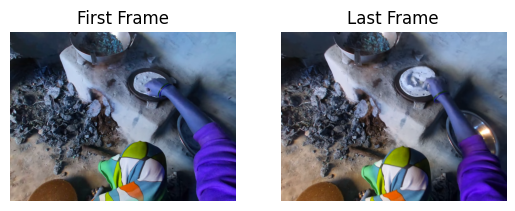

In [6]:
clip_file_path = get_frames_for_step(video_key, 50, narration_objs, video_path, clip_save_path)

In [7]:
# the complete clip for this step
Video.from_file(clip_file_path, width = 320, height = 320)

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00\nSH...', height='32…

# Good Examples

Annotation for step 3: #C C kneads dough with both hands
Begin-time for step 3:  1073.3280252666666
Ended-time for step 3: 1075.0543352666666
------------
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


<Figure size 640x480 with 0 Axes>

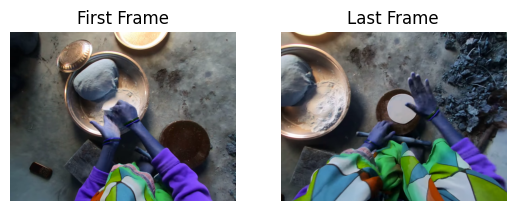

In [8]:
clip_file_path = get_frames_for_step(video_key, 3, narration_objs, video_path, clip_save_path)

In [9]:
# the complete clip for this step
Video.from_file(clip_file_path, width = 320, height = 320)

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00\x13\xb1;...', heigh…

Annotation for step 29: #C C kneads dough with both hands
Begin-time for step 29:  1189.9523552666665
Ended-time for step 29: 1195.2099452666666
------------
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


<Figure size 640x480 with 0 Axes>

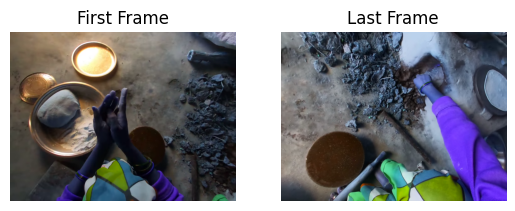

In [10]:
clip_file_path = get_frames_for_step(video_key, 29, narration_objs, video_path, clip_save_path)

In [11]:
# the complete clip for this step
Video.from_file(clip_file_path, width = 320, height = 320)

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00\x1bR\xec...', heigh…

# Problematic Examples

## 1. Videos are densely annotated, some of the steps are not really necessary for pre/post condition inference (exmaple below)

Annotation for step 200: #C C scratches her right leg.
Begin-time for step 200:  1978.1222552666666
Ended-time for step 200: 1987.7939852666664
------------
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


<Figure size 640x480 with 0 Axes>

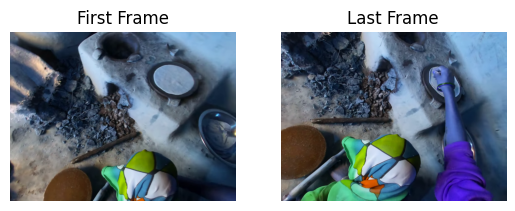

In [12]:
clip_file_path = get_frames_for_step(video_key, 200, narration_objs, video_path, clip_save_path)

In [13]:
# the complete clip for this step
Video.from_file(clip_file_path, width = 320, height = 320)

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x003\xe7\t...', height=…

## 2. For some steps, though annotation is accurate, it is still hard to tell whether the task is complete

Annotation for step 50: #C C flips dough
Begin-time for step 50:  1296.0927152666666
Ended-time for step 50: 1298.2405252666665
------------
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


<Figure size 640x480 with 0 Axes>

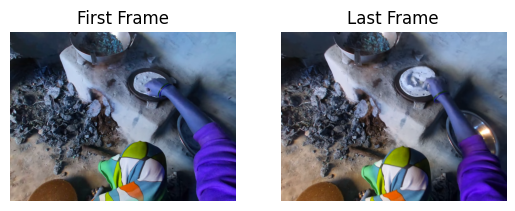

In [14]:
clip_file_path = get_frames_for_step(video_key, 50, narration_objs, video_path, clip_save_path)

In [15]:
# the complete clip for this step
Video.from_file(clip_file_path, width = 320, height = 320)

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00\nSH...', height='32…

## 3. For some steps, annotations are slightly off, but this has very bad impact on pre/post conditon analysis

Annotation for step 26: #C C transfers dough to stove 
Begin-time for step 26:  1176.3522052666665
Ended-time for step 26: 1182.4383052666665
------------
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


<Figure size 640x480 with 0 Axes>

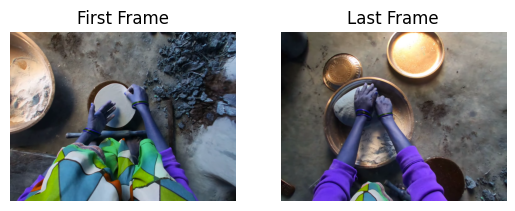

In [16]:
clip_file_path = get_frames_for_step(video_key, 26, narration_objs, video_path, clip_save_path)

In [17]:
# the complete clip for this step
Video.from_file(clip_file_path, width = 320, height = 320)

Video(value=b"\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00'\x86\x87...", heigh…

Annotation for step 5: #C C transfers dough to stove
Begin-time for step 5:  1088.0101052666664
Ended-time for step 5: 1093.0607452666666
------------
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


<Figure size 640x480 with 0 Axes>

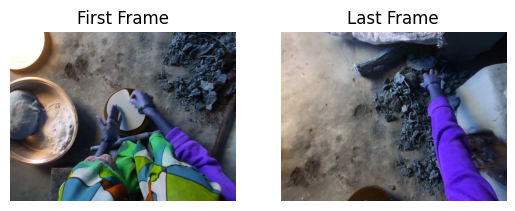

In [18]:
clip_file_path = get_frames_for_step(video_key, 5, narration_objs, video_path, clip_save_path)

In [19]:
# the complete clip for this step
Video.from_file(clip_file_path, width = 320, height = 320)

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00\x18\xc9w...', heigh…

# Video 2

In [20]:
video_key = "fcc1b592-f210-4e4a-a2e4-2dd811ae9b2b"
video_path = "/local1/jrbronkar/ego4d_videos/v1/full_scale/fcc1b592-f210-4e4a-a2e4-2dd811ae9b2b.mp4"
narrations_path = "/local1/jrbronkar/ego4d_videos/v1/annotations/narration.json"

In [21]:
# run this cell only once and then test for each step
narration_objs = get_narrations(video_key, narrations_path)

Annotations for step 0: #C C picks a vacuum cleaner socket
Begin-time for step 0:  2.3749186000000004
Finish-time for step 0: 5.5509386
------------
Annotations for step 1: #C C puts a vacuum cleaner socket in power supply 
Begin-time for step 1:  5.5509386
Finish-time for step 1: 11.6696486
------------
Annotations for step 2: #C C carries a glass table 
Begin-time for step 2:  11.6696486
Finish-time for step 2: 14.7970686
------------
Annotations for step 3: #C C puts down a glass table
Begin-time for step 3:  14.7970686
Finish-time for step 3: 18.5874886
------------
Annotations for step 4: #C C picks a seat cushion 
Begin-time for step 4:  18.5874886
Finish-time for step 4: 19.508618600000002
------------
Annotations for step 5: #C C puts down a seat cushion 
Begin-time for step 5:  19.508618600000002
Finish-time for step 5: 27.558348600000002
------------
Annotations for step 6: #C C moves sideways a glass table 
Begin-time for step 6:  27.558348600000002
Finish-time for step 6: 3

# good example

Annotation for step 21: #C C fixes vacuum cleaner pipes
Begin-time for step 21:  85.23524859999999
Ended-time for step 21: 96.0100286
------------
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


<Figure size 640x480 with 0 Axes>

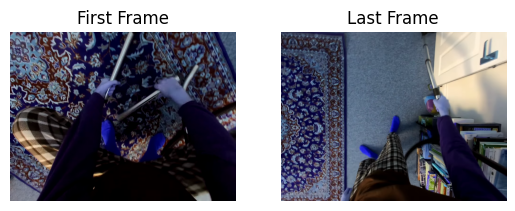

In [22]:
clip_file_path = get_frames_for_step(video_key, 21, narration_objs, video_path, clip_save_path)

In [23]:
# the complete clip for this step
Video.from_file(clip_file_path, width = 320, height = 320)

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00\xb7\xbe\x9b...', he…

## annotations are slightly off, very bad impact on pre/post conditon analysis

Annotation for step 26: #C C picks a cup of tea
Begin-time for step 26:  149.7367386
Ended-time for step 26: 156.48863859999997
------------
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


<Figure size 640x480 with 0 Axes>

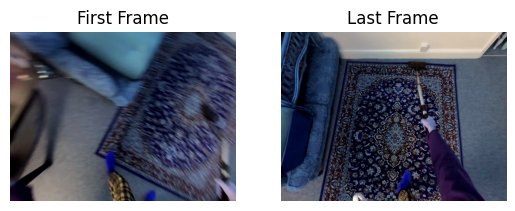

In [24]:
clip_file_path = get_frames_for_step(video_key, 26, narration_objs, video_path, clip_save_path)

In [25]:
# the complete clip for this step
Video.from_file(clip_file_path, width = 320, height = 320)

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00S\xe5\t...', height=…